## Oceanbolt Python SDK - List of Santos Port Calls

Example of Oceanbolt's Python SDK to answer the question - "Which vessels have called the port of Santos in the first six months of 2020?" 

In [7]:
# Import the relevant libraries
# In order to get a list of port calls, we use the PortCalls client (https://python-sdk.oceanbolt.com/portcalls_v3/port_calls.html)

from oceanbolt.sdk.client import APIClient
from oceanbolt.sdk.data.port_calls import PortCalls
from datetime import date, timedelta, datetime

In [8]:
# Create the base API client using your token. Tokens can be created in the Oceanbolt App (app.oceanbolt.com)
base_client = APIClient("<token>")

In [9]:
# Connect to the relevant Oceanbolt data endpoints using the base client object, ie: PortCalls
port_call_client = PortCalls(base_client)

In [10]:
# We apply filters to our query to get the list of vessels that have called the port of Santos in the last year
# A complete list of available filters can be found at https://python-sdk.oceanbolt.com/portcalls_v3/port_calls.html#arguments

df = port_call_client.get(
    port_id = [248], #Port ID can can be obtained from Port Flows module in the Oceanbolt App (https://app.oceanbolt.com/port-tradeflows) or from the ports endpoint
    start_date=date(2020, 1, 1),
    end_date=date(2020, 6, 30),
    max_results = 20000 #Increasing max results to 20k. The default setting is 100.
)

#Print 2 first rows of table
df.head(2)

,voyage_id,port_call_id,imo,vessel_name,port_id,port_name,segment,sub_segment,unlocode,berth_id,...,days_waiting,days_at_berth,country_code,operation,voyage_type,commodity,commodity_value,commodity_group,volume,port_visited
0,e566c3a65e735beecb7bdde383c1ac3d,71f2073924444ee4173b42ae4aafef01,9284908,CHANGJIANGCHUYUN,248,Santos,Panamax,Panamax (68-80k),BRSSZ,6184.0,...,8.66,2.12,BR,Load,Part of Laden Leg,Raw Sugar,sugar_raw,Agribulk,74800.0,True
1,85c9a86817a80c430e6973ee8a9a404a,befec309716c28cbd22f2d2c98bcbbf0,9658953,SAGA FANTASY,248,Santos,Supramax,Supramax (50-60k),BRSSZ,6181.0,...,0.37,2.95,BR,Load,Part of Laden Leg,Corn,corn,Grains,47000.0,True


In [13]:
#We are manipulating the arrived_at date filter to create a new column time_formatted that contains the number of the month when a vessel arrived to Santos 
date_format = "%Y-%m-%dT%H:%M:%SZ"
df["time_formatted"] = ""
for i in range(len(df)): 
        month = datetime.strptime(df['arrived_at'][i], date_format).month
        df.loc[i,"time_formatted"] = month

<AxesSubplot:>

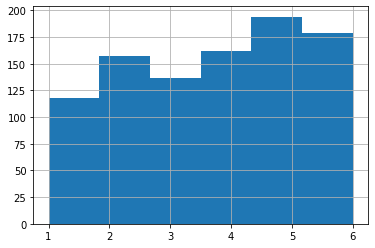

In [17]:
#With the time_formatted colum, we can now plot the number of port calls per month
df['time_formatted'].hist(bins=6)
#This example is an illustration only. Rather than doing this data manipulation yourself, try our port call timeseries client (https://python-sdk.oceanbolt.com/portcalls_v3/timeseries.html)